In [1]:
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet

In [2]:
df = pd.read_csv('../data/example_wp_log_peyton_manning.csv')

# Seasonality

##  Additive Seasonality

In [3]:
m = NeuralProphet()
metrics = m.fit(df)
metrics

Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


,SmoothL1Loss,MAE,RegLoss
0,0.390084,0.626091,0.0
1,0.211048,0.433583,0.0
2,0.176641,0.381797,0.0
3,0.178918,0.387365,0.0
4,0.185234,0.397194,0.0
5,0.186273,0.394050,0.0
6,0.197938,0.414894,0.0
7,0.176834,0.385823,0.0
8,0.173644,0.377548,0.0
9,0.175173,0.382722,0.0


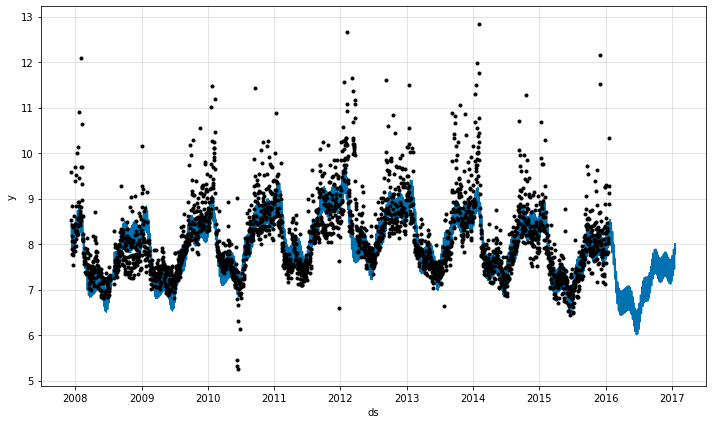

In [4]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

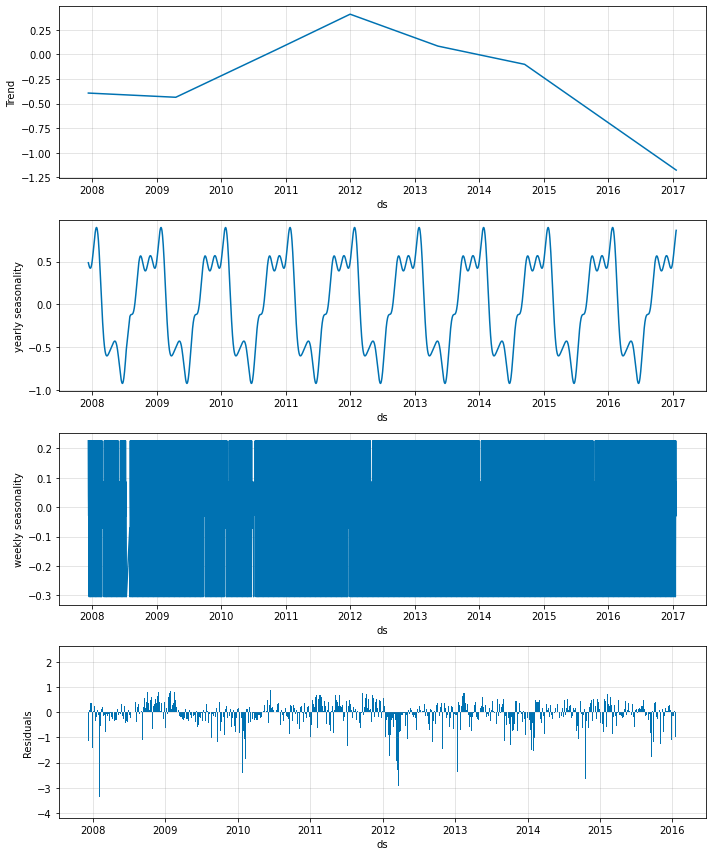

In [5]:
fig_comp = m.plot_components(forecast)

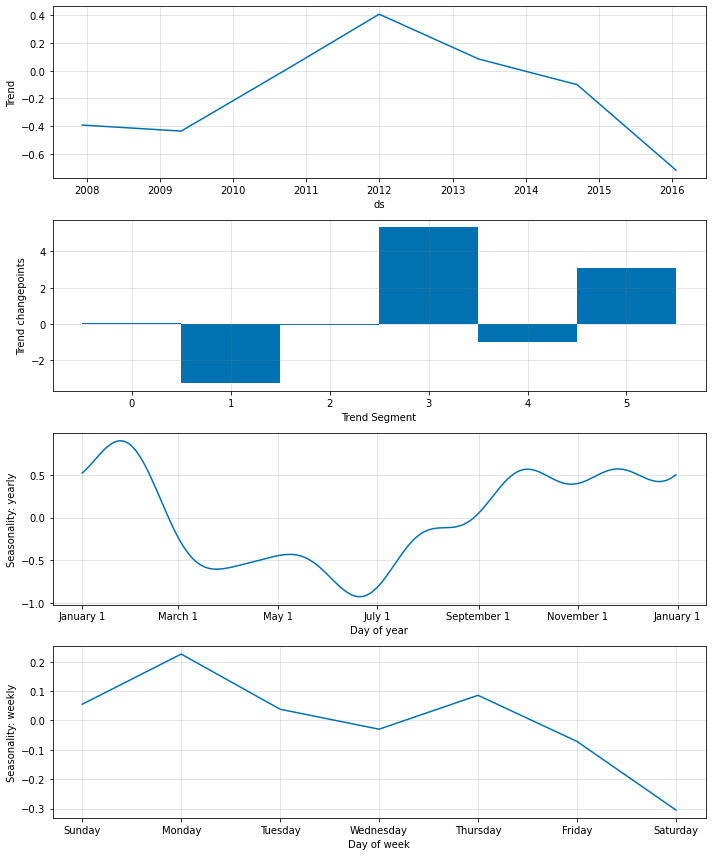

In [6]:
fig_param = m.plot_parameters()

##  Multiplicative Seasonality
Clearly, additive seasonality is the better fit for this data.

In [7]:
m = NeuralProphet(
#     n_changepoints=0, 
    seasonality_mode='multiplicative',
)
metrics = m.fit(df)

Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


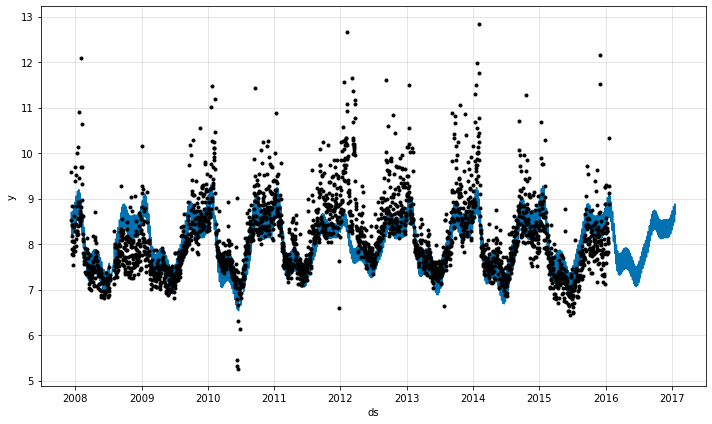

In [8]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

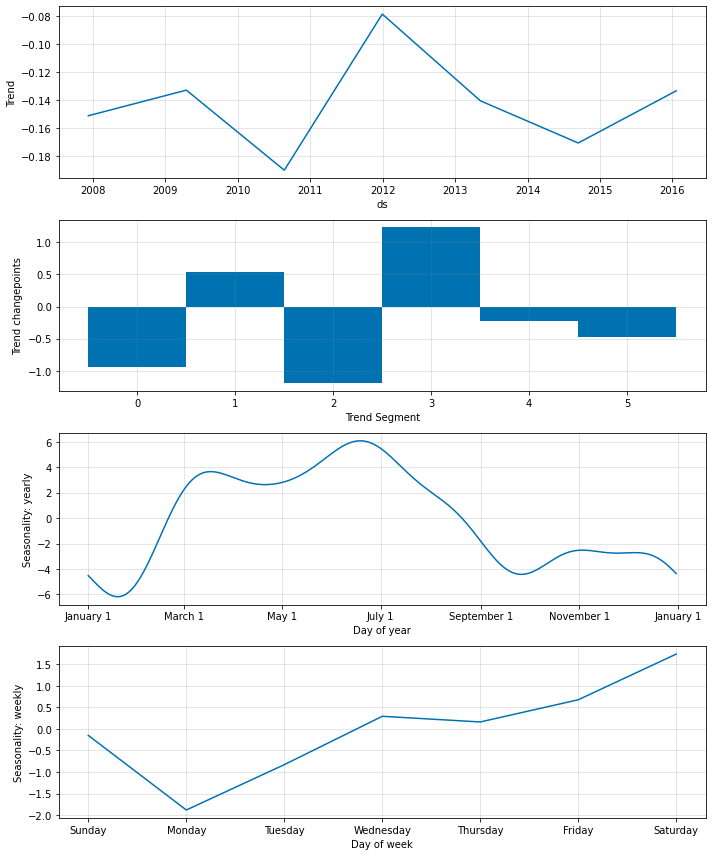

In [9]:
fig_param = m.plot_parameters()

##  Underfit Additive Seasonality

In [10]:
m = NeuralProphet(
    yearly_seasonality=2,
    weekly_seasonality=1,
    daily_seasonality=False,
)
metrics = m.fit(df)

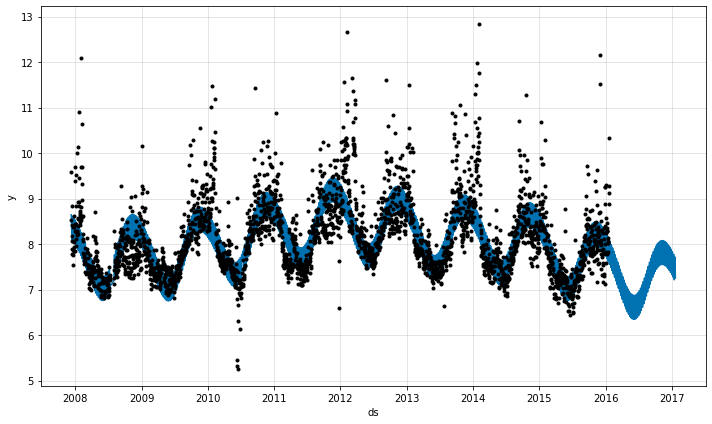

In [11]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

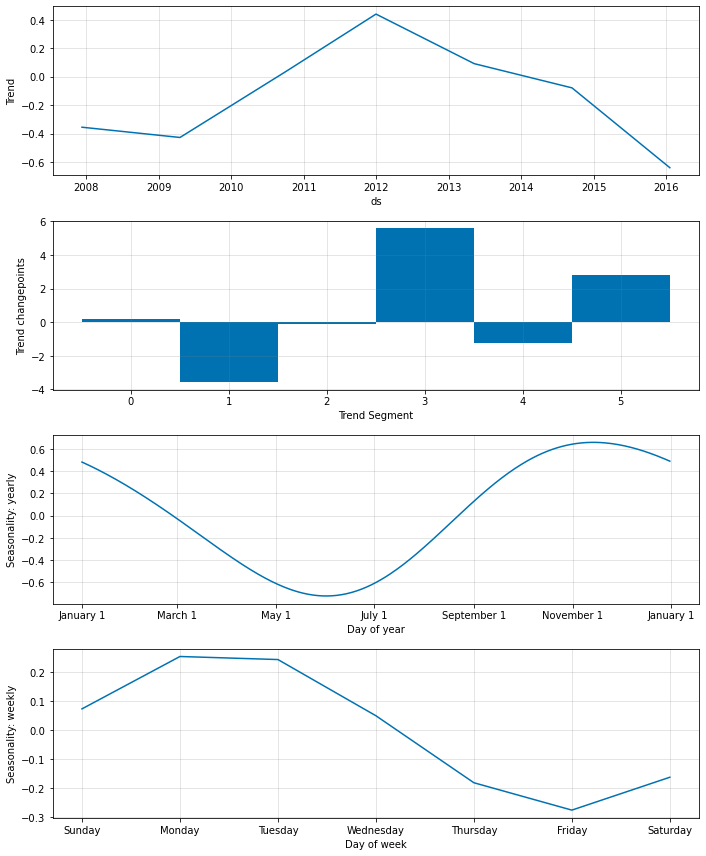

In [12]:
fig_param = m.plot_parameters()

##  Overfit Additive Seasonality

In [13]:
m = NeuralProphet(
    yearly_seasonality=16,
    weekly_seasonality=8,
    daily_seasonality=False,
)
metrics = m.fit(df)

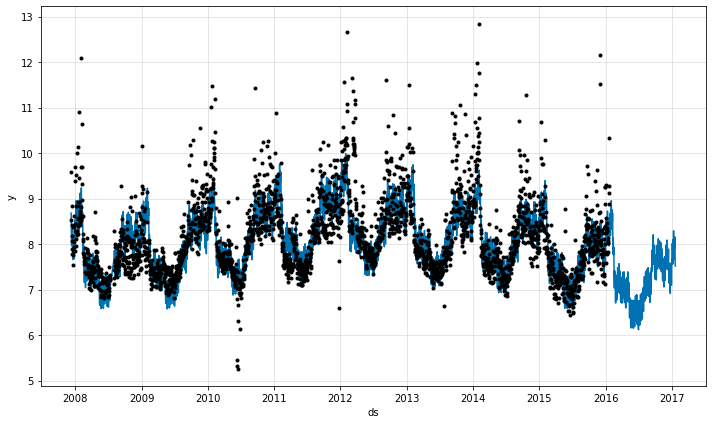

In [14]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

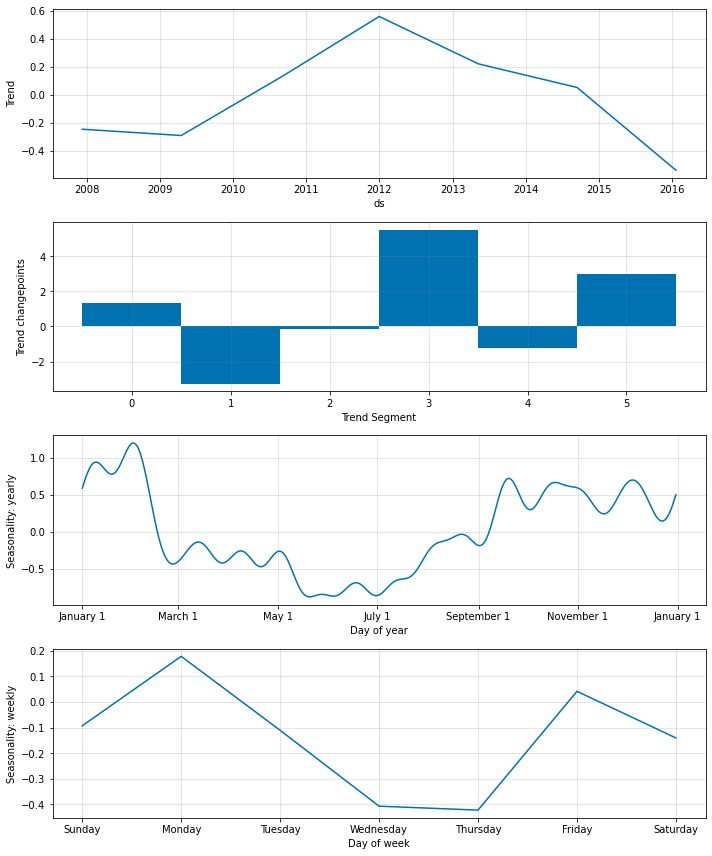

In [15]:
fig_param = m.plot_parameters()

In [16]:
print(sum(abs(m.model.season_params["yearly"].data.numpy())))
print(sum(abs(m.model.season_params["weekly"].data.numpy())))

# print(m.model.season_params["yearly"].data)
# print(m.model.season_params["weekly"].data)

3.128211136907339
4.178528603166342


##  Regularized Additive Seasonality

In [17]:
m = NeuralProphet(
    yearly_seasonality=16,
    weekly_seasonality=8,
    daily_seasonality=False,
    seasonality_reg=1,
)
metrics = m.fit(df)

NOTICE: A Regularization strength for the seasonal Fourier Terms was set.Please note that this feature is experimental.


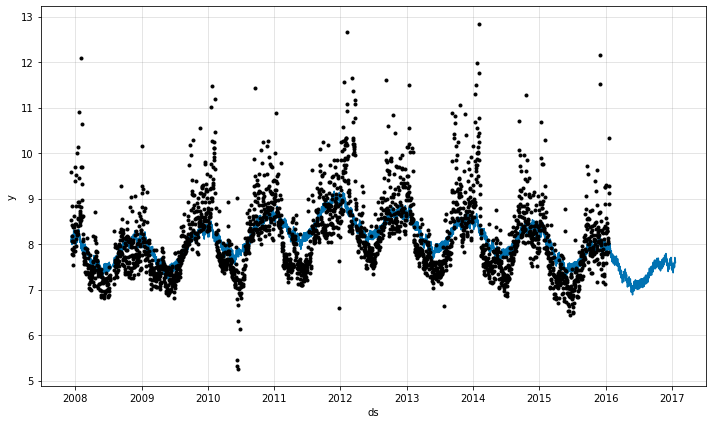

In [18]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

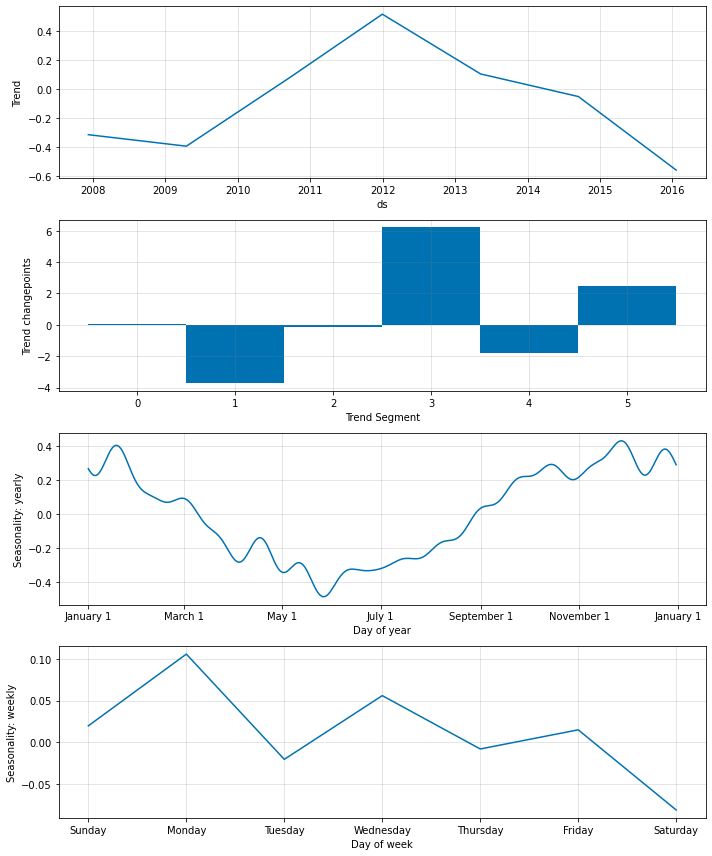

In [19]:
fig_param = m.plot_parameters()

In [20]:
print(sum(abs(m.model.season_params["yearly"].data.numpy())))
print(sum(abs(m.model.season_params["weekly"].data.numpy())))

# print(m.model.season_params["yearly"].data)
# print(m.model.season_params["weekly"].data)

0.9984649841208011
0.23008947621565312
